In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{libertine}\usepackage{sansmath}\sansmath")
params = {"axes.labelsize": 9, "xtick.labelsize": 9, "ytick.labelsize": 9}
plt.rcParams.update(params)

# Response time analysis of data from Smart & Szafir (2019)

Experiment two of Smart & Szafir (2019) examined how different colors and marker sizes affect the ability to discern different marker shapes on a scatter plot. A scatter plot with L\* = 50 gray markers as distractors is shown with two colored markers, which are either the same shape or different shapes. The experiment uses a binary forced-choice design where the research subject is asked whether or not the two colored markers are identical, with instructions to complete the task as quickly and accurately as possible. The authors' analysis considered how changing the marker size and color affected accuracy and concluded that there was no significant effect except for decreased accuracy for markers with L\* > 92.

The authors kindly published their raw data, allowing for reanalysis. Here, the response time is considered instead of the accuracy. Even if two markers can be accurately told apart, the response time should increase if doing so is difficult. Only responses with the smallest marker sized used in the experiments, 15 arcsec, are used to looked at the worst-case scenario. Only correct responses are considered.


## Data processing

Data comes from https://osf.io/34jca, file `Experiment_2/data/color-shape_data_processed.csv`, which has a revision date of 2018-09-19 and a SHA-256 checksum of c0fe510d1b673d26a9fa1085fc5da3017b27cc3814c6e587a1800a7a647c778d.

The data file is loaded and the timestamps are converted to response times. Incorrect responses and those with marker sizes larger than 15 arcsec and eliminated, as are responses with response times less than 0.5 seconds or more than 10 seconds.

In [3]:
# Columns: qnum, fixed_size, timeElapsed, L, A, B, numeric_response
qnum, size, elapsed_time, L, A, B, correct = np.loadtxt(
    "color-shape_data_processed.csv",
    skiprows=1,
    usecols=(11, 16, 17, 24, 25, 26, 27),
    unpack=True,
    delimiter=",",
)

In [4]:
# Convert to response times
elapsed_time2 = np.append(elapsed_time[:1], np.diff(elapsed_time))
elapsed_time2[qnum == 1] = elapsed_time[qnum == 1]
elapsed_time = elapsed_time2

In [5]:
# Limit to correct answers with smallest marker size
small_and_correct = np.logical_and(size == 0.25, correct == 1)
elapsed_time = elapsed_time[small_and_correct]
L = L[small_and_correct]

In [6]:
# Keep response times between 0.5 and 10 seconds
reasonable_times = np.logical_and(elapsed_time >= 500, elapsed_time <= 10000)
elapsed_time = elapsed_time[reasonable_times]
L = L[reasonable_times]

In [7]:
L.size

4932

## Results

The remaining responses are binned by L\*, and the response times are considered. The response times are considerably above average for the bins with L\* > 85 and for the bin with L\* = 50. The increased response time for the L\* = 50 bin is likely because the distractor markers are of the same lightness.

In [8]:
# Mean & standard error
mean = np.array([np.mean(elapsed_time[L == l]) for l in np.unique(L)])
se = np.array(
    [
        np.std(elapsed_time[L == l]) / np.sqrt(elapsed_time[L == l].size)
        for l in np.unique(L)
    ]
)
overall_mean = np.mean(elapsed_time)
overall_se = np.std(elapsed_time) / np.sqrt(elapsed_time.size)
print(f"Overall mean response time: {overall_mean:.0f} +/- {overall_se:.0f} ms")

Overall mean response time: 2501 +/- 26 ms


In [9]:
print(" L*    Mean (ms)  SE (ms)")
for i, l in enumerate(np.unique(L)):
    print(f"{l}     {mean[i]:4.0f}       {se[i]:3.0f}")

 L*    Mean (ms)  SE (ms)
50.0     3069       368
53.8     2204        64
57.7     2453        71
61.5     2248        76
65.4     2515        84
69.2     2542        83
73.1     2587        89
76.9     2526       102
80.8     2508        92
84.6     2526        97
88.5     2698       105
92.3     3176       163
96.2     3809       292


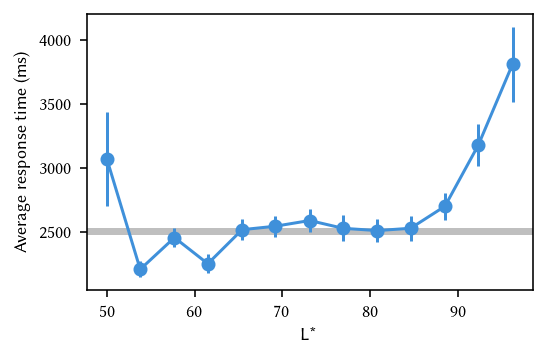

In [10]:
plt.figure(figsize=(3.9, 2.6))
plt.errorbar(np.unique(L), mean, se, marker="o", c="#3f90da")
plt.axhspan(
    overall_mean - overall_se, overall_mean + overall_se, alpha=0.25, fc="black"
)
plt.xlabel("L*")
plt.ylabel("Average response time (ms)")
plt.tight_layout()
plt.savefig("marker-shape-lightness.pdf", bbox_inches="tight")